In [60]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, make_scorer, roc_auc_score
from sklearn.tree import export_graphviz, plot_tree
from sklearn.model_selection import cross_val_score


In [70]:
data = pd.read_csv('housing.header.binary.txt')
data

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1
5,0.02985,0.0,2.18,0,0.4580,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,1
6,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,0
7,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,1
8,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,0
9,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,0


In [61]:
# [7.1]
# Use “Crim” and “Rm” as independent variables to train a decision tree to predict whether a house value 
# Medv is 1 or 0 (i.e., whether the house value is greater than 230k or not). [0.5 pt]

# Load the dataset into a pandas DataFrame
data = pd.read_csv('housing.header.binary.txt')

# dataset into independent (X) and the target  (y) variable
X = data[['Crim', 'Rm']]
y = data['Medv']

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

result = pd.concat([X, y], axis=1)
print(result)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(" \n Accuracy Value is:", accuracy)


         Crim     Rm  Medv
0     0.00632  6.575     1
1     0.02731  6.421     0
2     0.02729  7.185     1
3     0.03237  6.998     1
4     0.06905  7.147     1
5     0.02985  6.430     1
6     0.08829  6.012     0
7     0.14455  6.172     1
8     0.21124  5.631     0
9     0.17004  6.004     0
10    0.22489  6.377     0
11    0.11747  6.009     0
12    0.09378  5.889     0
13    0.62976  5.949     0
14    0.63796  6.096     0
15    0.62739  5.834     0
16    1.05393  5.935     1
17    0.78420  5.990     0
18    0.80271  5.456     0
19    0.72580  5.727     0
20    1.25179  5.570     0
21    0.85204  5.965     0
22    1.23247  6.142     0
23    0.98843  5.813     0
24    0.75026  5.924     0
25    0.84054  5.599     0
26    0.67191  5.813     0
27    0.95577  6.047     0
28    0.77299  6.495     0
29    1.00245  6.674     0
30    1.13081  5.713     0
31    1.35472  6.072     0
32    1.38799  5.950     0
33    1.15172  5.701     0
34    1.61282  6.096     0
35    0.06417  5.933     0
3

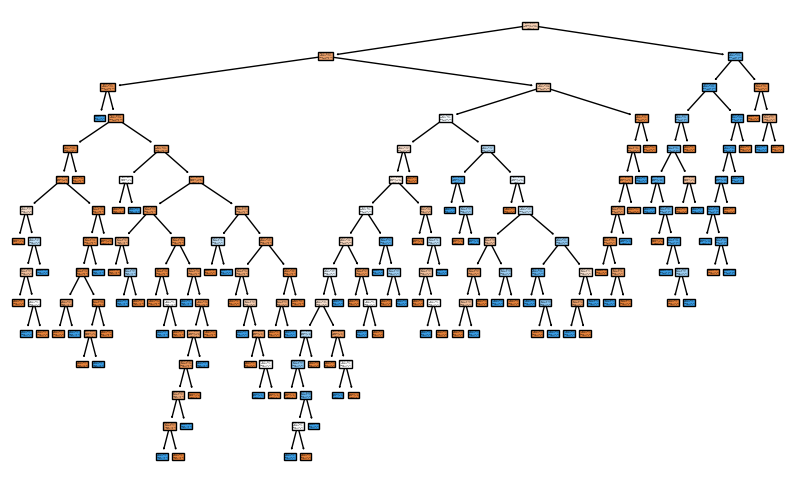



In this, X represents the input features and y represents the target variable. We need to replace X and y with the actual data.

The plot_tree function plots the decision tree using matplotlib. The filled=True parameter fills the tree nodes with colors based on the majority class, and the feature_names and class_names parameters provide labels for the features and classes, respectively.

The root node represents the starting point of the decision tree. The values in the root node correspond to the splitting criterion used at that node. For example, if the root node has a splitting criterion of "RM <= 6.94", it means that the decision tree is splitting the data based on the feature "RM" and the threshold value of 6.94. The splitting criterion in the root node helps in determining how the decision tree divides the data into different branches based on the feature values. Each subsequent node represents a decision based on a specific feature and threshold value, leading to further split

In [62]:
#[7.2]
#Visualize the tree (including nodes and labels) and explain the meaning of the values showing in the root node [0.5 pt].

# Create and train the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

print("""

In this, X represents the input features and y represents the target variable. We need to replace X and y with the actual data.

The plot_tree function plots the decision tree using matplotlib. The filled=True parameter fills the tree nodes with colors based on the majority class, and the feature_names and class_names parameters provide labels for the features and classes, respectively.

The root node represents the starting point of the decision tree. The values in the root node correspond to the splitting criterion used at that node. For example, if the root node has a splitting criterion of "RM <= 6.94", it means that the decision tree is splitting the data based on the feature "RM" and the threshold value of 6.94. The splitting criterion in the root node helps in determining how the decision tree divides the data into different branches based on the feature values. Each subsequent node represents a decision based on a specific feature and threshold value, leading to further splitting or classification. By visualizing the tree and examining the values in the root node, we can gain insights into the initial splitting decision made by the decision tree and how it partitions the data based on the chosen feature and threshold.
""")

In [63]:
# [ 7.3 ]
#Use 80% of instances in the “housing.header.binary.txt” dataset to build a decision tree classifier 
# (using all features) to predict house value Medv [0.5 pt]. 


# Load the dataset into a pandas DataFrame
data = pd.read_csv('housing.header.binary.txt')

# Split the dataset into independent variables (X) and the target variable (y)
X = data.drop('Medv', axis=1)  # All features except Medv
y = data['Medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

[a]
Confusion Matrix:
[[60  7]
 [ 9 26]]
TPR: 0.7428571428571429
FPR: 0.1044776119402985
Accuracy: 0.8431372549019608

 [b]


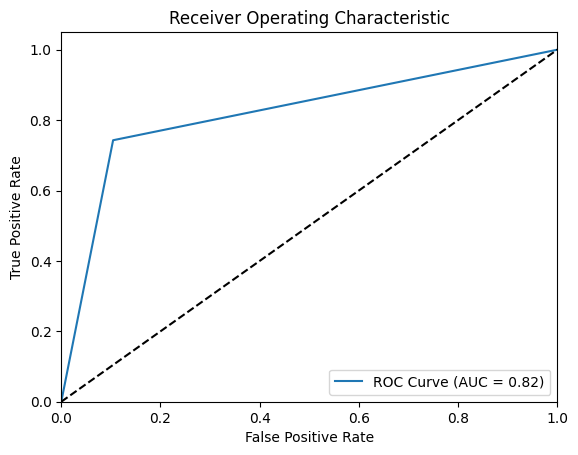


[c]
AUC value: 0.8191897654584221


In [64]:
# [7.4] Report the performance of the classifier on the remaining 20% of instances in the “housing.header.binary.txt”
#a.	Report confusion table, TPR, FPR, and the Accuracy [0.5 pt]
#b.	Report the ROC curve [0.25 pt]
#c.	Report the AUC value [0.25 pt]



# Load the dataset into a pandas DataFrame
data = pd.read_csv('housing.header.binary.txt')

# Split the dataset into independent variables (X) and the target variable (y)
X = data.drop('Medv', axis=1)  # All features except Medv
y = data['Medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

print("[a]")
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print(confusion)

# Calculate the true positive rate (TPR) and false positive rate (FPR)
tn, fp, fn, tp = confusion.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print("TPR:", tpr)
print("FPR:", fpr)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\n [b]")
# Compute the ROC curve
y_scores = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("\n[c]")
# Calculate the AUC value
auc_value = auc(fpr, tpr)
print("AUC value:", auc_value)


In [65]:
# [7.5] 
# Use 5-fold cross-validation to compare decision trees, trained using different parameter settings:

# I.Inside each fold of the 5-fold cross validation, using training set (and all features, excluding the class label) 
# to train three trees, by setting minimum number of samples allowed in each node as 1, 3, 5 respectively 
# (in Scikit learn, this is controlled by min_samples_split) [0.5 pt]


# Load the dataset into a pandas DataFrame
data = pd.read_csv('housing.header.binary.txt')

# Split the dataset into independent variables (X) and the target variable (y)
X = data.drop('Medv', axis=1)  # All features except Medv
y = data['Medv']

# Initialize decision tree classifiers with different min_samples_split values
tree1 = DecisionTreeClassifier(min_samples_split=2)
tree2 = DecisionTreeClassifier(min_samples_split=3)
tree3 = DecisionTreeClassifier(min_samples_split=5)

# Perform 5-fold cross-validation and evaluate each tree's performance
scores_tree1 = cross_val_score(tree1, X, y, cv=5)
scores_tree2 = cross_val_score(tree2, X, y, cv=5)
scores_tree3 = cross_val_score(tree3, X, y, cv=5)

print("I.")
# Print the average accuracy for each tree
print("Average Accuracy (min_samples_split=2):", scores_tree1.mean())
print("Average Accuracy (min_samples_split=3):", scores_tree2.mean())
print("Average Accuracy (min_samples_split=5):", scores_tree3.mean())


I.
Average Accuracy (min_samples_split=2): 0.7806445350417395
Average Accuracy (min_samples_split=3): 0.7686662783925451
Average Accuracy (min_samples_split=5): 0.8003494467093768


In [66]:
# II.
# Record performance of each tree (in terms of Accuracy and AUC values) on the test set as a list. [0.25 pt]
 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each tree on the test set
tree1.fit(X_train, y_train)
y_pred_tree1 = tree1.predict(X_test)
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)
auc_tree1 = roc_auc_score(y_test, y_pred_tree1)

tree2.fit(X_train, y_train)
y_pred_tree2 = tree2.predict(X_test)
accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
auc_tree2 = roc_auc_score(y_test, y_pred_tree2)

tree3.fit(X_train, y_train)
y_pred_tree3 = tree3.predict(X_test)
accuracy_tree3 = accuracy_score(y_test, y_pred_tree3)
auc_tree3 = roc_auc_score(y_test, y_pred_tree3)

print("II.")
# Record the performance of each tree in a list
performance = [
    {'Tree': 'Tree1', 'Accuracy': accuracy_tree1, 'AUC': auc_tree1},
    {'Tree': 'Tree2', 'Accuracy': accuracy_tree2, 'AUC': auc_tree2},
    {'Tree': 'Tree3', 'Accuracy': accuracy_tree3, 'AUC': auc_tree3}
]

# Print the performance of each tree
for p in performance:
    print(f"{p['Tree']}: Accuracy = {p['Accuracy']:.4f}, AUC = {p['AUC']:.4f}")


II.
Tree1: Accuracy = 0.8627, AUC = 0.8478
Tree2: Accuracy = 0.8431, AUC = 0.8192
Tree3: Accuracy = 0.8333, AUC = 0.8117


In [67]:
# III.Calculate mean accuracy, and mean AUC values for three trees, after the 5-fold cross validation. 
# Report means accuracy and mean AUC values [0.25 pt]


# Initialize decision tree classifiers
tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier()
tree3 = DecisionTreeClassifier()

# Perform 5-fold cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}

accuracy_scores_tree1 = cross_val_score(tree1, X, y, cv=5, scoring='accuracy')
auc_scores_tree1 = cross_val_score(tree1, X, y, cv=5, scoring='roc_auc')

accuracy_scores_tree2 = cross_val_score(tree2, X, y, cv=5, scoring='accuracy')
auc_scores_tree2 = cross_val_score(tree2, X, y, cv=5, scoring='roc_auc')

accuracy_scores_tree3 = cross_val_score(tree3, X, y, cv=5, scoring='accuracy')
auc_scores_tree3 = cross_val_score(tree3, X, y, cv=5, scoring='roc_auc')

# Calculate mean accuracy and mean AUC values
mean_accuracy_tree1 = accuracy_scores_tree1.mean()
mean_auc_tree1 = auc_scores_tree1.mean()

mean_accuracy_tree2 = accuracy_scores_tree2.mean()
mean_auc_tree2 = auc_scores_tree2.mean()

mean_accuracy_tree3 = accuracy_scores_tree3.mean()
mean_auc_tree3 = auc_scores_tree3.mean()

print("III.")
# Print the mean accuracy and mean AUC values for each tree
print(f"Tree1: Mean Accuracy = {mean_accuracy_tree1:.4f}, Mean AUC = {mean_auc_tree1:.4f}")
print(f"Tree2: Mean Accuracy = {mean_accuracy_tree2:.4f}, Mean AUC = {mean_auc_tree2:.4f}")
print(f"Tree3: Mean Accuracy = {mean_accuracy_tree3:.4f}, Mean AUC = {mean_auc_tree3:.4f}")


III.
Tree1: Mean Accuracy = 0.7449, Mean AUC = 0.7281
Tree2: Mean Accuracy = 0.7766, Mean AUC = 0.7817
Tree3: Mean Accuracy = 0.7667, Mean AUC = 0.7654


In [68]:
#IV
#Analysis the performance of the three trees and explain how does the minimum number of samples allowed 
#for each node (i.e., min_samples_split) impact on the tree performance. [0.5 pt]

print("IV.")

print("""
Explanation of how the minimum number of samples allowed for each node (i.e., min_samples_split) impacts the performance of the three trees:

The minimum number of samples allowed for each node, controlled by the min_samples_split parameter, has a significant impact on the performance of decision trees. When this value is set too low, the tree tends to overfit the training data by capturing noise and specific details of the training set. As a result, the tree may not generalize well to unseen data, leading to lower accuracy and AUC values on the test set.

On the other hand, setting the min_samples_split value too high can result in underfitting, where the tree fails to capture important patterns and relationships in the data. The tree becomes too generalized, leading to poor performance on both the training and test sets.

Choosing the optimal min_samples_split value is crucial for achieving a balance between capturing relevant information from the data and avoiding overfitting or underfitting. By tuning this parameter carefully, we can optimize the tree's performance on unseen data. It is recommended to perform a systematic search or use techniques like cross-validation to find the best min_samples_split value that maximizes the accuracy and AUC metrics on the test set.

Overall, the min_samples_split parameter acts as a regularization mechanism in decision trees, controlling the trade-off between model complexity and generalization. Finding the right balance is essential for building decision trees that perform well on unseen data."
""")


IV.

Explanation of how the minimum number of samples allowed for each node (i.e., min_samples_split) impacts the performance of the three trees:

The minimum number of samples allowed for each node, controlled by the min_samples_split parameter, has a significant impact on the performance of decision trees. When this value is set too low, the tree tends to overfit the training data by capturing noise and specific details of the training set. As a result, the tree may not generalize well to unseen data, leading to lower accuracy and AUC values on the test set.

On the other hand, setting the min_samples_split value too high can result in underfitting, where the tree fails to capture important patterns and relationships in the data. The tree becomes too generalized, leading to poor performance on both the training and test sets.

Choosing the optimal min_samples_split value is crucial for achieving a balance between capturing relevant information from the data and avoiding overfitting o